## Initial Assumptions and Predictions:

### Assumptions:
1. Each user will have varying levels of activity based on their lifestyle and usage of Fitbit.
2. Inactivity is defined as any hour with fewer than 100 steps, and users should aim to stay active for at least 10 hours per day.
3. Minute-level data will reveal bursts of activity, while hourly data will help identify extended periods of inactivity.

### Predictions:
- At least one of the users will likely exceed 10 hours of inactivity per day.
- Users will exhibit varying step patterns, with some showing consistent activity and others displaying sporadic bursts.

In [ ]:
# prompt: Access My Drive/DATA3406 and get all  csv

from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/DATA3406'  # Replace with your actual directory path



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/DATA3406/dailySteps_merged.csv', '/content/drive/MyDrive/DATA3406/hourlySteps_merged.csv', '/content/drive/MyDrive/DATA3406/minuteStepsWide_merged.csv']


## Daily Step Count Analysis

This section calculates the daily step statistics for each user. For each person, I will calculate:
1. The total number of days for which we have data.
2. The average step count per day.
3. The maximum and minimum step count.
4. An additional observation on the consistency of their daily activity levels.

## Step 1: Data Loading and Filtering

We begin by loading the data for each of the three selected users and filtering out their specific daily, hourly, and minute-level step data.

In [ ]:
import pandas as pd
daily_steps = pd.read_csv(str(data_dir) + '/dailySteps_merged.csv')
hourly_steps = pd.read_csv(str(data_dir) + '/hourlySteps_merged.csv')
minute_steps = pd.read_csv(str(data_dir)+ '/minuteStepsWide_merged.csv')

print(daily_steps.head())
print(hourly_steps.head())
print(minute_steps.head())


           Id ActivityDay  StepTotal
0  1503960366   4/12/2016      13162
1  1503960366   4/13/2016      10735
2  1503960366   4/14/2016      10460
3  1503960366   4/15/2016       9762
4  1503960366   4/16/2016      12669
           Id           ActivityHour  StepTotal
0  1503960366  4/12/2016 12:00:00 AM        373
1  1503960366   4/12/2016 1:00:00 AM        160
2  1503960366   4/12/2016 2:00:00 AM        151
3  1503960366   4/12/2016 3:00:00 AM          0
4  1503960366   4/12/2016 4:00:00 AM          0
           Id           ActivityHour  Steps00  Steps01  Steps02  Steps03  \
0  1503960366  4/13/2016 12:00:00 AM        4       16        0        0   
1  1503960366   4/13/2016 1:00:00 AM        0        0        0        0   
2  1503960366   4/13/2016 2:00:00 AM        0        0        0        0   
3  1503960366   4/13/2016 3:00:00 AM        0        0        0        0   
4  1503960366   4/13/2016 4:00:00 AM        0        0        0        0   

   Steps04  Steps05  Steps06  Ste

In [ ]:
# Define inactivity as zero or very low step count (e.g., < 100 steps)
inactive_sleep_hours = hourly_steps_night[hourly_steps_night['StepTotal'] < 100]

# Print out the identified inactive sleep hours
print("Identified sleep hours for user with inactivity:")
print(inactive_sleep_hours[['ActivityHour', 'StepTotal']])


Identified sleep hours for user with inactivity:
           ActivityHour  StepTotal
3   2016-04-12 03:00:00          0
4   2016-04-12 04:00:00          0
5   2016-04-12 05:00:00          0
6   2016-04-12 06:00:00          0
7   2016-04-12 07:00:00          0
..                  ...        ...
699 2016-05-11 03:00:00         10
700 2016-05-11 04:00:00          0
701 2016-05-11 05:00:00          0
702 2016-05-11 06:00:00          0
703 2016-05-11 07:00:00         47

[230 rows x 2 columns]


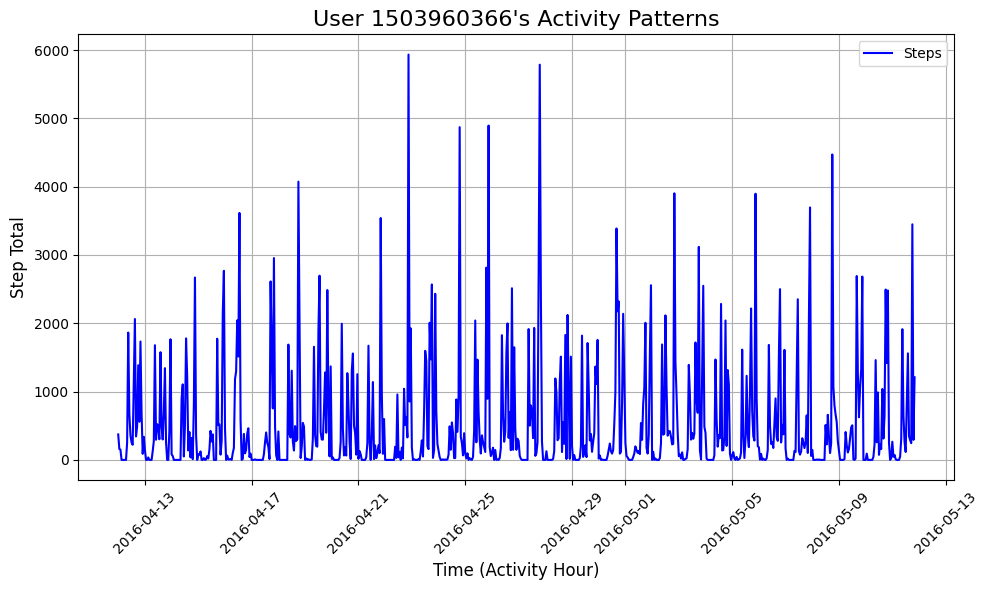

In [ ]:
import matplotlib.pyplot as plt

# Filter data for one user (example user: '1503960366')
user_id = 1503960366
hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

# Convert 'ActivityHour' to datetime
hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

# Plotting activity patterns
plt.figure(figsize=(10, 6))
plt.plot(hourly_steps_user['ActivityHour'], hourly_steps_user['StepTotal'], label='Steps', color='b')

# Formatting the plot
plt.title(f"User {user_id}'s Activity Patterns", fontsize=16)
plt.xlabel('Time (Activity Hour)', fontsize=12)
plt.ylabel('Step Total', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

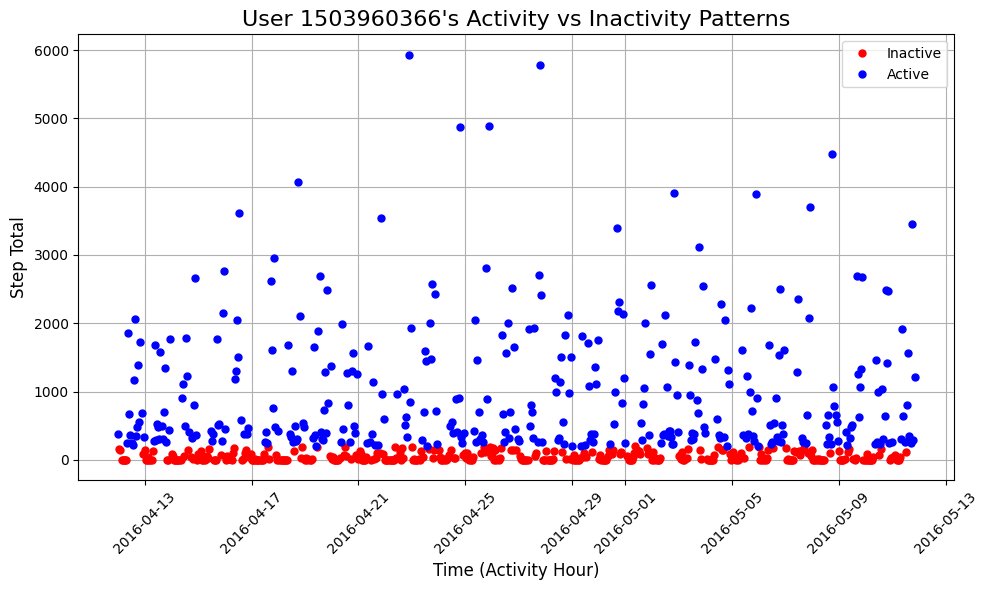

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter data for one user (example user: '1503960366')
user_id = 1503960366
hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

# Convert 'ActivityHour' to datetime
hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

# Define threshold for inactivity (e.g., less than 100 steps is considered inactive)
inactive_threshold = 200

# Create a new column 'ActivityStatus' to classify activity vs inactivity
hourly_steps_user['ActivityStatus'] = hourly_steps_user['StepTotal'].apply(lambda x: 'Active' if x >= inactive_threshold else 'Inactive')

# Plotting active vs inactive periods
plt.figure(figsize=(10, 6))

# Plot inactive periods (steps below threshold)
inactive_periods = hourly_steps_user[hourly_steps_user['ActivityStatus'] == 'Inactive']
plt.plot(inactive_periods['ActivityHour'], inactive_periods['StepTotal'], 'ro', label='Inactive', markersize=5)

# Plot active periods (steps above threshold)
active_periods = hourly_steps_user[hourly_steps_user['ActivityStatus'] == 'Active']
plt.plot(active_periods['ActivityHour'], active_periods['StepTotal'], 'bo', label='Active', markersize=5)

# Formatting the plot
plt.title(f"User {user_id}'s Activity vs Inactivity Patterns", fontsize=16)
plt.xlabel('Time (Activity Hour)', fontsize=12)
plt.ylabel('Step Total', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:

# Function to calculate average daily step count for a specific user
def calculate_inactivity_including_sleep(user_id, daily_steps):
    """
    This function calculates the average daily step count for a given user
    and determines if it is less than 100 steps per day, including all periods (including sleep).

    Parameters:
    user_id (int): The ID of the user to analyze
    daily_steps (DataFrame): The daily steps dataset containing 'Id' and 'StepTotal'

    Returns:
    average_daily_steps (float): The average daily step count for the user
    is_inactive (bool): True if the average daily step count is less than 100, False otherwise
    """
    # Filter data for the specific user
    daily_steps_user = daily_steps[daily_steps['Id'] == user_id].copy()

    # Calculate the average daily step count
    average_daily_steps = daily_steps_user['StepTotal'].mean()

    # Determine if the user is inactive (average steps < 100)
    is_inactive = average_daily_steps < 200

    # Return the result
    return average_daily_steps, is_inactive

# Example usage
user_id = 2320127002  # Replace with the user ID of your choice
average_steps, inactive_including_sleep = calculate_inactivity_including_sleep(user_id, daily_steps)

# Output the result
print(f"User {user_id}'s average daily step count is {average_steps:.2f}")
if inactive_including_sleep:
    print(f"User {user_id} is inactive (average daily step count is less than 100), including sleep periods.")
else:
    print(f"User {user_id} is active (average daily step count is 100 or more), including sleep periods.")

User 2320127002's average daily step count is 4716.87
User 2320127002 is active (average daily step count is 100 or more), including sleep periods.


#CREATES RANDOM USERS


In [ ]:
def get_random_users(df, num_users=1, seed=None):
    """
    This function selects random users from the dataset.

    Parameters:
    df (DataFrame): The DataFrame containing the data with user 'Id' column.
    num_users (int): The number of random users to select (default is 1).
    seed (int): Random seed for reproducibility (optional).

    Returns:
    List of random user IDs.
    """
    # Set the random seed if provided (optional for reproducibility)
    if seed is not None:
        random.seed(seed)

    # Get the unique user IDs from the dataset
    unique_users = df['Id'].unique()

    # Select the random users
    random_users = random.sample(list(unique_users), num_users)

    return random_users

# Example usage
random_users = get_random_users(daily_steps, num_users=3, seed=42)  # Select 3 random users
print("Randomly selected user IDs:", random_users)

Randomly selected user IDs: [2320127002, 1624580081, 4558609924]


In [ ]:
import pandas as pd

# Function to calculate average daily step count excluding sleep periods
def calculate_inactivity_excluding_sleep(user_id, hourly_steps, sleep_start='22:00:00', sleep_end='06:00:00'):
    """
    This function calculates the average daily step count for a given user
    and determines if it is less than 100 steps per day, excluding sleep periods.

    Parameters:
    user_id (int): The ID of the user to analyze
    hourly_steps (DataFrame): The hourly steps dataset containing 'Id', 'ActivityHour', and 'StepTotal'
    sleep_start (str): Start time of the sleep period (default: 10:00 PM)
    sleep_end (str): End time of the sleep period (default: 6:00 AM)

    Returns:
    average_daily_steps (float): The average daily step count for the user excluding sleep
    is_inactive (bool): True if the average daily step count is less than 100, False otherwise
    """
    # Filter data for the specific user
    hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

    # Convert 'ActivityHour' to datetime
    hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

    # Define night hours (sleep hours: 10:00 PM to 6:00 AM)
    sleep_hours_start = pd.to_datetime(sleep_start).time()
    sleep_hours_end = pd.to_datetime(sleep_end).time()

    # Filter out the hours that are during the sleep period
    waking_hours = hourly_steps_user[
        (hourly_steps_user['ActivityHour'].dt.time < sleep_hours_start) &
        (hourly_steps_user['ActivityHour'].dt.time > sleep_hours_end)]

    # Calculate total steps per day excluding sleep periods
    daily_steps_excluding_sleep = waking_hours.groupby(waking_hours['ActivityHour'].dt.date)['StepTotal'].sum()

    # Calculate the average daily steps excluding sleep periods
    average_daily_steps_excluding_sleep = daily_steps_excluding_sleep.mean()

    # Determine if the user is inactive (average steps < 100)
    is_inactive_excluding_sleep = average_daily_steps_excluding_sleep < 5000

    # Return the result
    return average_daily_steps_excluding_sleep, is_inactive_excluding_sleep

# Example usage
user_id = 2320127002  # Replace with the user ID of your choice
average_steps_excluding_sleep, inactive_excluding_sleep = calculate_inactivity_excluding_sleep(user_id, hourly_steps)

# Output the result
print(f"User {user_id}'s average daily step count excluding sleep is {average_steps_excluding_sleep:.2f}")
if inactive_excluding_sleep:
    print(f"User {user_id} is inactive (average daily step count is less than 100), excluding sleep periods.")
else:
    print(f"User {user_id} is active (average daily step count is 100 or more), excluding sleep periods.")

User 2320127002's average daily step count excluding sleep is 3711.35
User 2320127002 is inactive (average daily step count is less than 100), excluding sleep periods.


In [ ]:
import pandas as pd

# Function to calculate whether a person has less than 10 hours of activity a day
def calculate_activity_hours(user_id, hourly_steps, sleep_start='22:00:00', sleep_end='06:00:00', activity_threshold=200):
    """
    This function calculates whether a user has less than 10 hours of activity per day,
    both including and excluding sleep periods.

    Parameters:
    user_id (int): The ID of the user to analyze
    hourly_steps (DataFrame): The hourly steps dataset containing 'Id', 'ActivityHour', and 'StepTotal'
    sleep_start (str): Start time of the sleep period (default: 10:00 PM)
    sleep_end (str): End time of the sleep period (default: 6:00 AM)
    activity_threshold (int): The step threshold to define "activity" (default: 100 steps per hour)

    Returns:
    Tuple of booleans (including_sleep, excluding_sleep):
    - True if the user has less than 10 hours of activity, False otherwise.
    """
    # Filter data for the specific user
    hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

    # Convert 'ActivityHour' to datetime
    hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

    # Define sleep hours start and end times
    sleep_hours_start = pd.to_datetime(sleep_start).time()
    sleep_hours_end = pd.to_datetime(sleep_end).time()

    # Identify active hours (those where StepTotal >= activity_threshold)
    hourly_steps_user['IsActive'] = hourly_steps_user['StepTotal'] >= activity_threshold

    # Calculate active hours per day (including sleep periods)
    active_hours_including_sleep = hourly_steps_user.groupby(hourly_steps_user['ActivityHour'].dt.date)['IsActive'].sum()

    # Check if the user has less than 10 hours of activity per day (including sleep)
    less_than_10_hours_including_sleep = (active_hours_including_sleep < 10).all()

    # Exclude sleep hours (10:00 PM to 6:00 AM) for the calculation excluding sleep periods
    waking_hours = hourly_steps_user[
        (hourly_steps_user['ActivityHour'].dt.time < sleep_hours_start) &
        (hourly_steps_user['ActivityHour'].dt.time > sleep_hours_end)
    ]

    # Calculate active hours per day excluding sleep periods
    active_hours_excluding_sleep = waking_hours.groupby(waking_hours['ActivityHour'].dt.date)['IsActive'].sum()

    # Check if the user has less than 10 hours of activity per day (excluding sleep)
    less_than_10_hours_excluding_sleep = (active_hours_excluding_sleep < 10).all()

    return less_than_10_hours_including_sleep, less_than_10_hours_excluding_sleep

# Example usage
user_id = 2320127002  # Replace with the user ID of your choice
less_than_10_hours_incl_sleep, less_than_10_hours_excl_sleep = calculate_activity_hours(user_id, hourly_steps)

# Output the result
print(f"User {user_id} has less than 10 hours of activity per day (including sleep): {less_than_10_hours_incl_sleep}")
print(f"User {user_id} has less than 10 hours of activity per day (excluding sleep): {less_than_10_hours_excl_sleep}")

User 2320127002 has less than 10 hours of activity per day (including sleep): False
User 2320127002 has less than 10 hours of activity per day (excluding sleep): False


In [ ]:
import pandas as pd

# Function to mark if each hour is active or inactive based on daily activity threshold
def mark_hourly_activity(user_id, hourly_steps, sleep_start='22:00:00', sleep_end='06:00:00'):
    """
    This function marks each hour as active or inactive for a given user and identifies
    inactivity per day, using dynamic thresholds for daily step goals.

    Parameters:
    user_id (int): The ID of the user to analyze
    hourly_steps (DataFrame): The hourly steps dataset containing 'Id', 'ActivityHour', and 'StepTotal'
    sleep_start (str): Start time of the sleep period (default: 10:00 PM)
    sleep_end (str): End time of the sleep period (default: 6:00 AM)

    Returns:
    DataFrame: Modified DataFrame with activity status for each hour (active/inactive)
    """
    # Filter data for the specific user
    hourly_steps_user = hourly_steps[hourly_steps['Id'] == user_id].copy()

    # Convert 'ActivityHour' to datetime
    hourly_steps_user['ActivityHour'] = pd.to_datetime(hourly_steps_user['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

    # Define sleep hours start and end times
    sleep_hours_start = pd.to_datetime(sleep_start).time()
    sleep_hours_end = pd.to_datetime(sleep_end).time()

    # Create a separate column to identify if the hour falls within the sleep period
    hourly_steps_user['IsSleepHour'] = hourly_steps_user['ActivityHour'].dt.time.apply(
        lambda x: sleep_hours_start <= x or x <= sleep_hours_end
    )

    # Calculate the number of waking hours per day (i.e., hours not in the sleep period)
    hours_in_day = 24
    sleep_hours = 24 - len(hourly_steps_user[hourly_steps_user['IsSleepHour']].groupby(hourly_steps_user['ActivityHour'].dt.date).size())
    waking_hours = hours_in_day - sleep_hours

    # Calculate activity thresholds
    threshold_including_sleep = 5000 / hours_in_day  # Steps per hour including sleep (5000 / 24)
    threshold_excluding_sleep = 5000 / waking_hours  # Steps per hour excluding sleep

    # Mark hours as active or inactive based on the activity threshold including sleep
    hourly_steps_user['IsActiveIncludingSleep'] = hourly_steps_user['StepTotal'] >= threshold_including_sleep

    # Exclude sleep hours for waking hour calculations
    hourly_steps_waking = hourly_steps_user[~hourly_steps_user['IsSleepHour']].copy()  # Make a copy to avoid issues with chained indexing

    # Use .loc to avoid SettingWithCopyWarning
    hourly_steps_waking.loc[:, 'IsActiveExcludingSleep'] = hourly_steps_waking['StepTotal'] >= threshold_excluding_sleep

    # Combine the two results back into one DataFrame
    hourly_steps_user = pd.merge(
        hourly_steps_user,
        hourly_steps_waking[['ActivityHour', 'IsActiveExcludingSleep']],
        on='ActivityHour',
        how='left'
    )

    # Fill NaN values for 'IsActiveExcludingSleep' (since some hours are in the sleep period) with False
    hourly_steps_user['IsActiveExcludingSleep'].fillna(False, inplace=True)

    return hourly_steps_user

# Example usage
user_id = 2320127002  # Replace with the user ID of your choice
hourly_steps_with_activity = mark_hourly_activity(user_id, hourly_steps)

# Output the result
print("Modified DataFrame with activity status for each hour (including and excluding sleep):")
hourly_steps_with_activity

Modified DataFrame with activity status for each hour (including and excluding sleep):


,Id,ActivityHour,StepTotal,IsSleepHour,IsActiveIncludingSleep,IsActiveExcludingSleep
0,2320127002,2016-04-12 00:00:00,0,True,False,False
1,2320127002,2016-04-12 01:00:00,0,True,False,False
2,2320127002,2016-04-12 02:00:00,0,True,False,False
3,2320127002,2016-04-12 03:00:00,0,True,False,False
4,2320127002,2016-04-12 04:00:00,0,True,False,False
...,...,...,...,...,...,...
730,2320127002,2016-05-12 10:00:00,817,False,True,True
731,2320127002,2016-05-12 11:00:00,426,False,True,True
732,2320127002,2016-05-12 12:00:00,535,False,True,True
733,2320127002,2016-05-12 13:00:00,402,False,True,True


In [ ]:
import pandas as pd

# Function to calculate inactivity per day based on the hourly activity DataFrame
def calculate_inactivity_per_day(hourly_steps_user, include_sleep=True):
    """
    This function calculates inactivity (hours with no activity) per day for a given user.
    You can choose to include or exclude sleep periods in the calculation.

    Parameters:
    hourly_steps_user (DataFrame): The DataFrame with activity status for each hour (including and excluding sleep)
    include_sleep (bool): If True, inactivity includes sleep hours. If False, inactivity excludes sleep periods.

    Returns:
    DataFrame: A DataFrame with the number of inactive hours per day.
    """
    if include_sleep:
        # Calculate inactivity including sleep by counting hours where IsActiveIncludingSleep is False
        inactivity_per_day = hourly_steps_user.groupby(hourly_steps_user['ActivityHour'].dt.date)['IsActiveIncludingSleep'].apply(lambda x: (~x).sum())
        column_name = 'InactiveIncludingSleep'
    else:
        # Calculate inactivity excluding sleep by counting hours where IsActiveExcludingSleep is False
        inactivity_per_day = hourly_steps_user.groupby(hourly_steps_user['ActivityHour'].dt.date)['IsActiveExcludingSleep'].apply(lambda x: (~x).sum())
        column_name = 'InactiveExcludingSleep'

    # Convert the result to a DataFrame for easier handling
    inactivity_df = pd.DataFrame(inactivity_per_day).reset_index()
    inactivity_df.columns = ['Date', column_name]

    return inactivity_df

# Example usage
user_id = 1503960366  # Replace with the user ID of your choice
hourly_steps_with_activity = mark_hourly_activity(user_id, hourly_steps)

# Calculate inactivity per day including sleep
inactivity_incl_sleep = calculate_inactivity_per_day(hourly_steps_with_activity, include_sleep=True)

# Calculate inactivity per day excluding sleep
inactivity_excl_sleep = calculate_inactivity_per_day(hourly_steps_with_activity, include_sleep=False)

# Output the results
print("Inactivity per day (including sleep):")
print(inactivity_incl_sleep)

print("\nInactivity per day (excluding sleep):")
print(inactivity_excl_sleep)

Inactivity per day (including sleep):
          Date  InactiveIncludingSleep
0   2016-04-12                       8
1   2016-04-13                      10
2   2016-04-14                      14
3   2016-04-15                      15
4   2016-04-16                      14
5   2016-04-17                      16
6   2016-04-18                      11
7   2016-04-19                      10
8   2016-04-20                      13
9   2016-04-21                      14
10  2016-04-22                      16
11  2016-04-23                      14
12  2016-04-24                      14
13  2016-04-25                      13
14  2016-04-26                      12
15  2016-04-27                      12
16  2016-04-28                      12
17  2016-04-29                      13
18  2016-04-30                      15
19  2016-05-01                      15
20  2016-05-02                       8
21  2016-05-03                      11
22  2016-05-04                      14
23  2016-05-05            

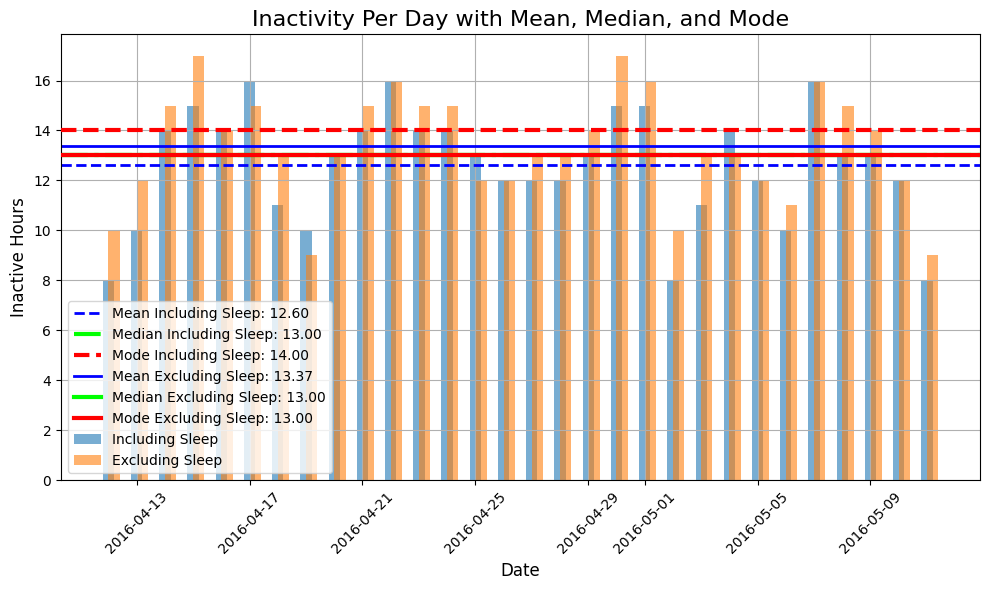

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Function to plot the inactivity data with mean, median, and mode
def plot_inactivity_statistics(inactivity_incl_sleep, inactivity_excl_sleep):
    """
    This function generates a bar plot showing inactivity per day, both including and excluding sleep,
    and plots the mean, median, and mode for each type of inactivity.

    Parameters:
    inactivity_incl_sleep (DataFrame): DataFrame with inactivity including sleep
    inactivity_excl_sleep (DataFrame): DataFrame with inactivity excluding sleep
    """
    # Merge the two DataFrames on 'Date'
    inactivity_df = pd.merge(inactivity_incl_sleep, inactivity_excl_sleep, on='Date')

    # Calculate mean, median, and mode for both inactivity including and excluding sleep
    mean_incl_sleep = inactivity_df['InactiveIncludingSleep'].mean()
    median_incl_sleep = inactivity_df['InactiveIncludingSleep'].median()
    mode_incl_sleep_result = stats.mode(inactivity_df['InactiveIncludingSleep'], keepdims=True)
    mode_incl_sleep = mode_incl_sleep_result.mode[0] if mode_incl_sleep_result.count[0] > 1 else None  # Ensure mode exists

    mean_excl_sleep = inactivity_df['InactiveExcludingSleep'].mean()
    median_excl_sleep = inactivity_df['InactiveExcludingSleep'].median()
    mode_excl_sleep_result = stats.mode(inactivity_df['InactiveExcludingSleep'], keepdims=True)
    mode_excl_sleep = mode_excl_sleep_result.mode[0] if mode_excl_sleep_result.count[0] > 1 else None  # Ensure mode exists

    # Plot the data
    plt.figure(figsize=(10, 6))

    # Bar plot for inactivity including sleep
    plt.bar(inactivity_df['Date'], inactivity_df['InactiveIncludingSleep'], width=0.4, label='Including Sleep', align='center', alpha=0.6)

    # Bar plot for inactivity excluding sleep
    plt.bar(inactivity_df['Date'], inactivity_df['InactiveExcludingSleep'], width=0.4, label='Excluding Sleep', align='edge', alpha=0.6)

    # Plot mean and median for inactivity including sleep
    plt.axhline(y=mean_incl_sleep, color='blue', linestyle='--', label=f'Mean Including Sleep: {mean_incl_sleep:.2f}', zorder=2, linewidth=2)
    plt.axhline(y=median_incl_sleep, color='lime', linestyle='-.', label=f'Median Including Sleep: {median_incl_sleep:.2f}', zorder=2, linewidth=3)  # Changed color and style

    # Plot mode if it exists for inactivity including sleep
    if mode_incl_sleep is not None:
        plt.axhline(y=mode_incl_sleep, color='red', linestyle='--', label=f'Mode Including Sleep: {mode_incl_sleep:.2f}', zorder=3, linewidth=3)

    # Plot mean and median for inactivity excluding sleep
    plt.axhline(y=mean_excl_sleep, color='blue', linestyle='-', label=f'Mean Excluding Sleep: {mean_excl_sleep:.2f}', zorder=2, linewidth=2)
    plt.axhline(y=median_excl_sleep, color='lime', linestyle='-', label=f'Median Excluding Sleep: {median_excl_sleep:.2f}', zorder=2, linewidth=3)  # Changed color and style

    # Plot mode if it exists for inactivity excluding sleep
    if mode_excl_sleep is not None:
        plt.axhline(y=mode_excl_sleep, color='red', linestyle='-', label=f'Mode Excluding Sleep: {mode_excl_sleep:.2f}', zorder=3, linewidth=3)

    # Formatting the plot
    plt.title("Inactivity Per Day with Mean, Median, and Mode", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Inactive Hours", fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
user_id = 1503960366  # Replace with the user ID of your choice
hourly_steps_with_activity = mark_hourly_activity(user_id, hourly_steps)

# Calculate inactivity per day including sleep
inactivity_incl_sleep = calculate_inactivity_per_day(hourly_steps_with_activity, include_sleep=True)

# Calculate inactivity per day excluding sleep
inactivity_excl_sleep = calculate_inactivity_per_day(hourly_steps_with_activity, include_sleep=False)

# Plot the inactivity data with statistics
plot_inactivity_statistics(inactivity_incl_sleep, inactivity_excl_sleep)

#
two different hours, we must compare by hours where each hour must be compared by 5000 steps/day recommendation by the doctor.

Make a function that edits the indivisual for if they are active for every hour. THis will be used to identify the inactiveness/day.

